Data Exploration: (Score : 1)
Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.

In [33]:
import pandas as pd

# Load the dataset
Emp_Data = pd.read_csv("/content/Employee.csv")
Emp_Data


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [34]:
# Explore the data
print([Emp_Data.head()])


[   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0]


In [35]:
print(Emp_Data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


In [36]:
print(Emp_Data.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [41]:
Emp_Data.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [42]:
Emp_Data = Emp_Data.rename(columns={'Company':'Company Name','Place': 'Residence', 'Salary': 'Annual Salary'})


In [44]:
# List down the unique values in each feature and find its length
for column in Emp_Data.columns:
    Unique_items_per_column=Emp_Data[column].nunique()
    print(f"Unique values in {column}: { Unique_items_per_column}")
    Unique_items=Emp_Data[column].unique()
    print(f" \t Unique values: {Unique_items} ")
    length_unique_values=len(Unique_items)
    print("length_unique_values",length_unique_values)
    print("_________________________________________________")


Unique values in Company Name: 6
 	 Unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] 
length_unique_values 7
_________________________________________________
Unique values in Age: 29
 	 Unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] 
length_unique_values 30
_________________________________________________
Unique values in Annual Salary: 40
 	 Unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] 
length_unique_values 41
_________________________________________________
Unique values in Residence: 11
 	 Unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] 
lengt

Data Cleaning: (Score : 2)
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [46]:
import numpy as np
Emp_Data['Age'] =Emp_Data['Age'].replace(0, np.nan)# Replace age 0 with NaN
Emp_Data['Age']

,Age
0,20.0
1,30.0
2,35.0
3,40.0
4,23.0
...,...
142,22.0
143,33.0
145,44.0
146,33.0


In [38]:
Emp_Data.duplicated().sum()#checking for duplicated rows

4

In [39]:
Emp_Data.drop_duplicates(inplace=True) #removing duplicated rows

In [40]:
Emp_Data.duplicated().sum()

0

In [47]:
Emp_Data.isnull().sum() #checking for null values

,0
Company Name,8
Age,23
Annual Salary,23
Residence,14
Country,0
Gender,0


In [53]:
# Handling null values in all columns (both numeric and string type)
for column in Emp_Data.select_dtypes(include=['object']).columns:
    if Emp_Data[column].isnull().any():
        Emp_Data[column] =Emp_Data[column].fillna(Emp_Data[column].mode())


In [54]:

Emp_Data

,Company Name,Age,Annual Salary,Residence,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [55]:
# Find the outliers
Q1 = Emp_Data['Age'].quantile(0.25)
Q3 = Emp_Data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
Emp_Data = Emp_Data[(Emp_Data['Age'] > lower_bound) & (Emp_Data['Age'] < upper_bound)]


# Handle outliers using IQR (Interquartile Range) or Z-Score
from scipy import stats
z_scores = np.abs(stats.zscore(Emp_Data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)

# Remove outliers
data_no_outliers = Emp_Data[~outliers]

# Output the cleaned data
print(Emp_Data.isnull().sum())
print(data_no_outliers.head())

Company Name      6
Age               0
Annual Salary    22
Residence        12
Country           0
Gender            0
dtype: int64
  Company Name   Age  Annual Salary Residence Country  Gender
0          TCS  20.0            NaN   Chennai   India       0
1      Infosys  30.0            NaN    Mumbai   India       0
2          TCS  35.0         2300.0  Calcutta   India       0
3      Infosys  40.0         3000.0     Delhi   India       0
4          TCS  23.0         4000.0    Mumbai   India       0


Data Analysis: (Score : 2)
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually

In [58]:
Emp_Data_filtered = Emp_Data[(Emp_Data['Age'] > 40) & (Emp_Data['Annual Salary'] < 5000)]

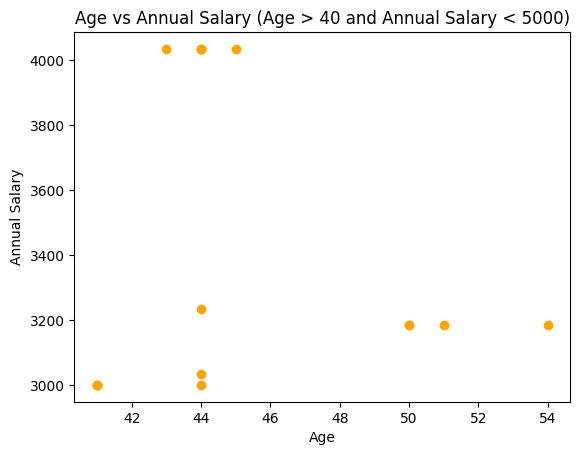

In [66]:
# Plot the chart with age and salary
import matplotlib.pyplot as plt
plt.scatter(Emp_Data_filtered ['Age'], Emp_Data_filtered ['Annual Salary'],color="Orange")
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.title('Age vs Annual Salary (Age > 40 and Annual Salary < 5000)')
plt.show()


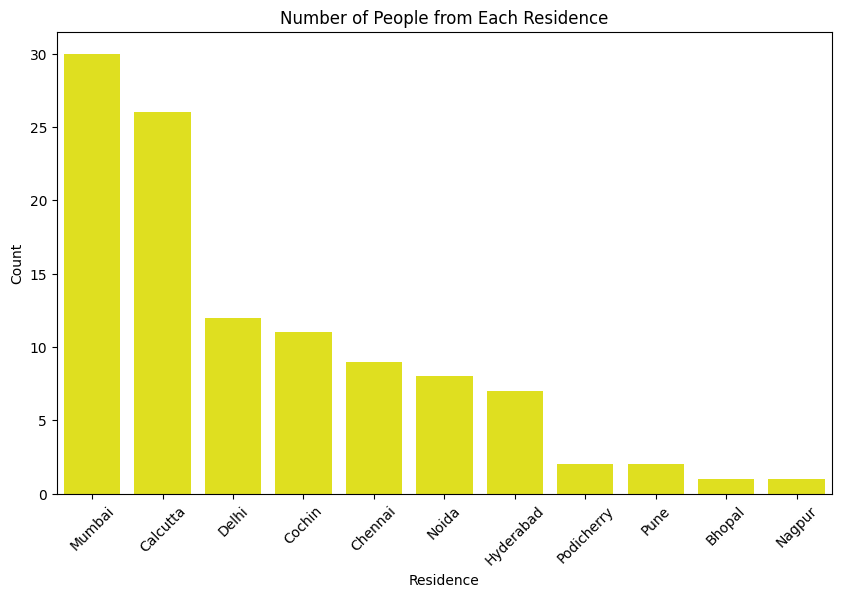

Residence
Mumbai        30
Calcutta      26
Delhi         12
Cochin        11
Chennai        9
Noida          8
Hyderabad      7
Podicherry     2
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


In [73]:
place_count = Emp_Data['Residence'].value_counts()

# Plot the count of people from each place
plt.figure(figsize=(10, 6))
sns.barplot(x=place_count.index, y=place_count.values,color="Yellow")
plt.title('Number of People from Each Residence')
plt.xlabel('Residence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(place_count)

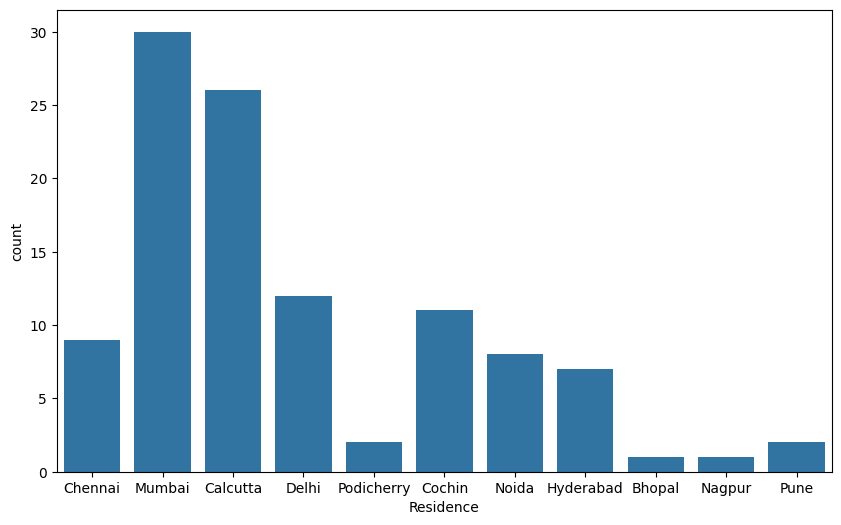

In [74]:
# Count the number of people from each place and represent it visually
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Residence', data=Emp_Data)
plt.show()


Data Encoding: (Score : 2)
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.



In [77]:
Emp_Data.columns

Index(['Company Name', 'Age', 'Annual Salary', 'Residence', 'Country',
       'Gender'],
      dtype='object')

In [83]:
# Convert categorical variables into numerical representations
from sklearn.preprocessing import LabelEncoder
pd.options.mode.copy_on_write = True# to remove copy warning (self copy)
le = LabelEncoder()
Emp_Data['Residence1'] = le.fit_transform(Emp_Data['Residence'])
Emp_Data['Company Name1'] = le.fit_transform(Emp_Data['Company Name'])
Emp_Data#Company Name and Residence changed to numerical values

,Company Name,Age,Annual Salary,Residence,Country,Gender,Residence1,Company Name1
0,4,20.0,NaN,2,0,0,2,4
1,2,30.0,NaN,6,0,0,6,2
2,4,35.0,2300.0,1,0,0,1,4
3,2,40.0,3000.0,4,0,0,4,2
4,4,23.0,4000.0,6,0,0,6,4
...,...,...,...,...,...,...,...,...
142,3,22.0,8202.0,6,0,0,6,3
143,4,33.0,9024.0,1,0,1,1,4
145,2,44.0,4034.0,4,0,1,4,2
146,4,33.0,5034.0,6,0,1,6,4


Feature Scaling: (Score : 2)
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.
Class comments
Your work
Assigned
Private comments



In [85]:
# Perform the scaling of the features using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Emp_Data[['Age', 'Annual Salary']] = sc.fit_transform(Emp_Data[['Age', 'Annual Salary']])
Emp_Data

,Company Name,Age,Annual Salary,Residence,Country,Gender,Residence1,Company Name1
0,4,-1.345094,NaN,2,0,0,2,4
1,2,-0.228029,NaN,6,0,0,6,2
2,4,0.330504,-1.105435,1,0,0,1,4
3,2,0.889036,-0.847251,4,0,0,4,2
4,4,-1.009975,-0.478418,6,0,0,6,4
...,...,...,...,...,...,...,...,...
142,3,-1.121681,1.071420,6,0,0,6,3
143,4,0.107091,1.374601,1,0,1,1,4
145,2,1.335863,-0.465878,4,0,1,4,2
146,4,0.107091,-0.097044,6,0,1,6,4


Summary

**Data Exploration**: List unique values, check data types, perform statistical analysis, and rename columns.

**Data Cleaning:** Handle missing values, remove duplicates, replace age 0 with NaN, and remove outliers.

**Data Analysis**: Filter based on age and salary, visualize relationships, and count people from each place.

**Data Encoding**: Apply Label Encoding  to categorical features.

**Feature Scaling:** Normalize the features using StandardScaler
